In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [29]:
data = pd.read_csv("load/USA_CA_Modesto.Muni.AP.724926_TMY3_BASE.csv")
# data from NREL: https://openei.org/datasets/dataset/commercial-and-residential-hourly-load-profiles-for-all-tmy3-locations-in-the-united-states

In [30]:
data.head()


,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,01/01 01:00:00,0.712377,2.894254,0,2.516708,0.0,0.069809,0.069809,0.069809,0.128562,0.026369,0.092943,0.379618,0.351395
1,01/01 02:00:00,0.607102,3.041735,0,2.737585,0.0,0.075936,0.075936,0.075936,0.074995,0.015382,0.076186,0.349528,0.280072
2,01/01 03:00:00,0.563318,3.020224,0,2.735789,0.0,0.075886,0.075886,0.075886,0.053568,0.010987,0.062326,0.345476,0.260637
3,01/01 04:00:00,0.552604,3.115433,0,2.825874,0.0,0.078385,0.078385,0.078385,0.053568,0.010987,0.053976,0.340613,0.266096
4,01/01 05:00:00,0.551332,3.162903,0,2.816787,0.0,0.078133,0.078133,0.078133,0.053568,0.010987,0.065823,0.327746,0.323539


In [31]:
drop_cols = [x for x in data.columns if ('Electricity' not in x) and ('Date/Time' not in x) ]
data_el = data.drop(drop_cols,axis=1)
data_el['total']=data_el[[x for x in data_el.columns if ('Electricity' in x)]].sum(axis=1)

# rescale electricity demand
data_el['total'] = data_el['total']*1.5
print(data_el['total'].head())
print(data_el['total'].describe())
data_el.head()

0    2.323947
1    2.026502
2    1.895001
3    1.870355
4    1.865782
Name: total, dtype: float64
count    8760.000000
mean        3.492676
std         2.241839
min         1.143706
25%         2.048225
50%         2.662501
75%         4.463155
max        17.897003
Name: total, dtype: float64


,Date/Time,Electricity:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),total
0,01/01 01:00:00,0.712377,0,0.0,0.069809,0.069809,0.069809,0.128562,0.026369,0.092943,0.379618,2.323947
1,01/01 02:00:00,0.607102,0,0.0,0.075936,0.075936,0.075936,0.074995,0.015382,0.076186,0.349528,2.026502
2,01/01 03:00:00,0.563318,0,0.0,0.075886,0.075886,0.075886,0.053568,0.010987,0.062326,0.345476,1.895001
3,01/01 04:00:00,0.552604,0,0.0,0.078385,0.078385,0.078385,0.053568,0.010987,0.053976,0.340613,1.870355
4,01/01 05:00:00,0.551332,0,0.0,0.078133,0.078133,0.078133,0.053568,0.010987,0.065823,0.327746,1.865782


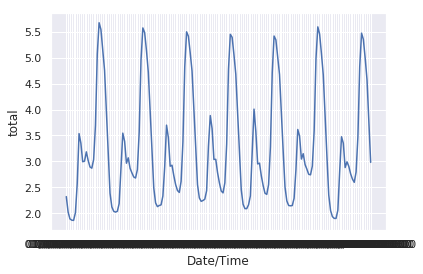

In [32]:
sns.lineplot(x='Date/Time',y='total',data=data_el[0:168])

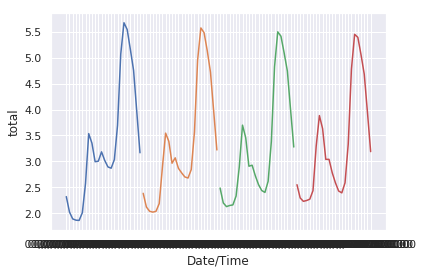

In [33]:
## plotting
for day in range(4):
  d= data_el[day*24:(day+1)*24]
  sns.lineplot(x='Date/Time',y='total',data=d)


In [34]:
data_solar = pd.read_csv("solar/modesto_solar_residential_7kw.csv",header=None)
#solar data prep
data_solar.columns=['date','PV']
data_solar.index=[i for i in range(len(data_solar))]
data_solar.drop(index=[i for i in range(9)],inplace=True,axis=0) # drop 0 and 1:8 (UTC)
data_solar.index=[i for i in range(len(data_solar))]
data_solar['PV']=data_solar['PV']/1000
#rescale the 7kW system to our size
system_size=7
# user input:
solar_kW=2
data_solar['PV']=data_solar['PV']*solar_kW/system_size

In [35]:
data_solar.head()

,date,PV
0,2019-04-18 09:00:00+00:00,-0.000403
1,2019-04-18 10:00:00+00:00,-0.000403
2,2019-04-18 11:00:00.000013+00:00,-0.000403
3,2019-04-18 12:00:00+00:00,-0.000403
4,2019-04-18 13:00:00+00:00,-0.000403


In [36]:
# Random samples from the full data (10000)

N_el = len(data_el)//24 # days
N_solar = len(data_solar)//24 # days
samp_interv_el=30 # days
samp_interv_solar=10 # days

data_ar=[]
solar_ar=[]
data_nosol_ar=[]
y_ar=[] # 0: solar was not installed       # 1: solar was installed
# we generate a sample set where 50% of the samples have solar installed, and 50% have no solar installed
thres=0.5  # percentage of non installed solar 

import random
random.seed(21)
N_samples= 10000
for i in range(N_samples):
    idx_el = random.randint(0,N_el-samp_interv_el-samp_interv_solar)
    idx_solar = random.randint(0,N_solar-samp_interv_solar)
    elec = np.asarray(data_el[idx_el*24:(idx_el+samp_interv_el)*24]['total'])
    sol = np.asarray(data_solar[idx_solar*24:(idx_solar+samp_interv_solar)*24]['PV'])
    net_load = elec.copy()
    # randomly generate samples of installed and noninstalled solar
    sol_rand = random.random()
    solar_ison=0
    if sol_rand <thres:
        #solar is not installed
        solar_ison = 0
    else:
        # solar is installed
        solar_ison=1
        net_load[-samp_interv_solar*24:]=net_load[-samp_interv_solar*24:]-sol
    y_ar.append(solar_ison)
    data_ar.append(net_load)
    solar_ar.append(sol)
    data_nosol_ar.append(elec)

In [37]:
###### Analyze minima to figure if solar has been installed

minimum=np.zeros((len(data_ar),len(data_ar[0])//24))

# iterate through all samples 
for i in range(len(data_ar)):
    # for each day, find minimum
    for j in range(len(data_ar[0])//24):
        minimum[i,j] = min(data_ar[i][j*24:(j+1)*24])
        #sdv[i,j] = np.std(data_ar[i][j*24:(j+1)*24])







In [38]:
# rolling horizon to determine whether a certain sample has solar installed

# set certainty interval
s=10  # one standard deviation = 66%

#number of days to wait until we make the decision
d=1

y_mosaic = np.zeros(len(data_ar))

# iterate through all samples 
for i in range(len(data_ar)):
    # rolling horizon through sample 
    for k in range(10,len(data_ar[0])//24):
        # calculate rolling mean of min
        rol_mean = np.mean(minimum[i,:k])
        # calculate rolling standard deviation of min
        rol_sdv = np.std(minimum[i,:k])
        # if new day is out of standard deviation percentage, mark as installed solar
        mn_this_day = minimum[i,k]
        
        if rol_mean-rol_sdv*s > mn_this_day:
            y_mosaic[i]=1
    



In [39]:
#print(y_mosaic,y_ar)
sum(y_mosaic==y_ar)

7022

In [40]:
minimum, sdv
plt.hist(minimum[0])

NameError: name 'sdv' is not defined